# Adaptive filtering algorithms

## Notes

- `padasip`, Python module implementing adaptive filters: http://matousc89.github.io/padasip/
- Reference for using `padasip`: https://github.com/matousc89/Python-Adaptive-Signal-Processing-Handbook
- Consider using Julia to speed up analysis (faster than Python, easier to write than C)

## References



## Imports and magics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Create random number generator

In [2]:
rng = np.random.default_rng(12345)

## Create simple noisy signal

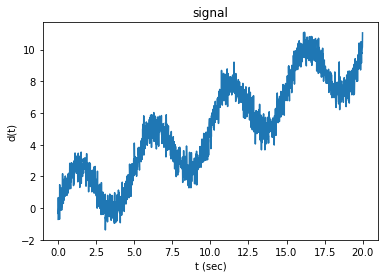

In [3]:
t_min = 0
t_max = 20
smp_rate = 100
freq = 0.2
amp = 2.0
slope = 0.5
noise_std = 0.5

t_vals = np.linspace(t_min, t_max, smp_rate * (t_max - t_min), False)
sig_clean = slope * t_vals + amp * np.sin(2 * np.pi * freq * t_vals)
sig = sig_clean + noise_std * rng.standard_normal(t_vals.shape)

plt.plot(t_vals, sig)
plt.title('signal')
plt.xlabel('t (sec)')
plt.ylabel('d(t)');

## Least mean squares (LMS) filter

- Implementation based on 
- Additional reference: http://www2.ece.rochester.edu/~zduan/teaching/ece472/projects/2017/JonathanCedarleaf_StevePhilbert_ArvindRamanathan_paper.pdf

In [4]:
def lms_filter(x, d, p, mu):
    
    n_smps = x.shape[0]
    
    x_aug = np.concatenate([np.zeros(p), x])
    wts = np.zeros((n_smps, p))
    y = np.zeros(n_smps)
    err = np.zeros(n_smps)
    
    for n in range(n_smps - 1):
        
        x_n = x_aug[n + p:n:-1]
        y[n] = wts[n, :] @ x_n
        err[n] = d[n] - y[n]
        
        wts[n + 1, :] = wts[n, :] + mu * err[n] * x_n
        
    x_last = x_aug[n_smps - 1 + p:n_smps - 1:-1]
    y[-1] = wts[-1, :] @ x_last
    err[-1] = d[-1] - y[-1]
    
    return y, wts, err

Text(0.5, 0, '$k$')

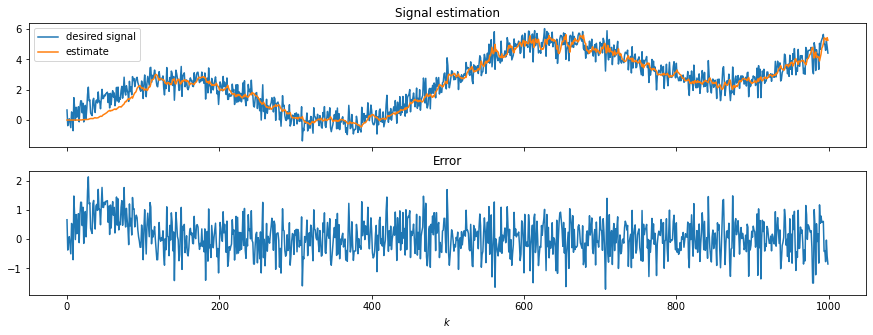

In [52]:
# Use previous points in signal to predict next point
n_pts = 1000
x = sig[0:n_pts]
d = sig[1:n_pts + 1]
y, wts, err = lms_filter(x, d, 10, 0.001)

fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)

ax_1.plot(d)
ax_1.plot(y)
ax_1.set_title('Signal estimation')
ax_1.legend(['desired signal', 'estimate'])

ax_2.plot(err)
ax_2.set_title('Error')
ax_2.set_xlabel('$k$');

## Notes

- Interesting: If learning rate is set too low ($\mu = 0.01$), we see an explosion in weights at k=590. Not sure why this is
- Is this the reason people use normalized LMS?